Load the dataset from the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/datasets_ml/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/datasets_ml/sign_mnist_test.csv')

In [ ]:
len(train)

27455

Description of dataset:<br>
The dataset contins 27455 train images. Each image has a label associated with it, and the rest of the columns are pixel values of each pixel.<br>
It contains 784 such pixels.

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
labels = train['label'].values

In [ ]:
val_unique = np.array(labels)
np.unique(val_unique)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Every alphabet has a label. The below plot shows the frequencies of each alphabet in the train set.

<Axes: ylabel='count'>

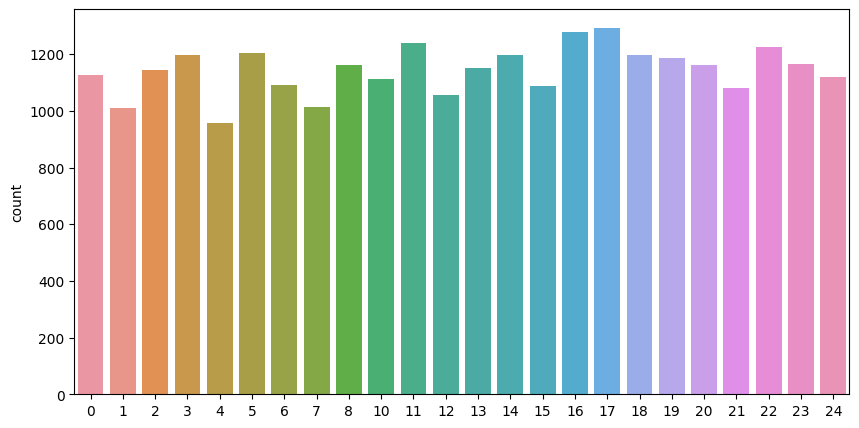

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=labels)

Label Binarizer is used here to convert the categorical data i.e. alphabets into binary data - 0/1

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

We now drop the labels from the dataframe because we need only images to feed in the model.

In [ ]:
train.drop('label',axis=1,inplace=True)

Original image

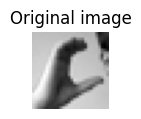

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

images = train.values
images = np.array([np.reshape(i, (28, 28)).astype(np.uint8) for i in images])
plt.figure(figsize=(1, 1))
plt.imshow(images[2], cmap='gray')  # Display as grayscale image
plt.axis('off')
plt.title('Original image')
plt.show()



Histogram of a random image from all the train set.

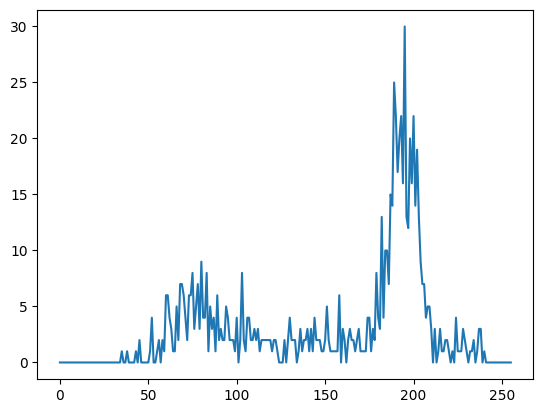

In [ ]:
image=images[2]

histr = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

DATA PREPOCESSING ON TRAIN DATA.

1.   Convert the data into 8 bit unsigned single channel because the next function needs it.
2.   Use contrast adaptive histogram equalisation
3.  Convert image back to float
4.  Gamma correction
5.  Scaling to desired range
6.  Gaussian filtering
7.  Canny Edge detection
8.  Normalize the images
9.  Adaptive thresholding




In [ ]:
import cv2
import numpy as np
from skimage import exposure

# Sample image preprocessing steps
def preprocess_image(image):

    # Apply CLAHE to enhance local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)

    image = image.astype(np.float32)

    # Apply gamma correction for brightness and contrast control
    gamma = 2
    image = cv2.pow(image, gamma)
    cv2_imshow(image)

    # Convert the enhanced image to the desired range
    image = (image - image.min()) / (image.max() - image.min())

    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply edge detection (Canny edge detector) to the enhanced image
    edges = cv2.Canny((image * 255).astype('uint8'), 160, 220)

    # Convert the edges image to a float in the range [0, 1]
    edges = edges / 255.0
    edges = (edges * 255).astype('uint8')

    # Apply adaptive thresholding to the "edges" image
    edges = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 0)

    return edges


In [ ]:
image=images[2]
image = image.reshape((28,28))
image = preprocess_image(image)
cv2_imshow(image)

Split the data into training and test set.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(19218, 28, 28)
(8237, 28, 28)


Reshape images to feed into the model.

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)


(19218, 28, 28, 1)
(8237, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch = 128
n_class = 24
epochs = 10

Train the CNN Model as per requirements.

In [ ]:
# # Step 5: Define the Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(n_class, activation = 'softmax'))

Compile the model

In [ ]:
# Step 6: Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 64)         

In [ ]:
history = model.fit(x_train,y_train
                    ,validation_data = (x_test,y_test),epochs = epochs, batch_size=batch)

Epoch 1/10
151/151 [==============================] - 42s 268ms/step - loss: 3.0873 - accuracy: 0.1354 - val_loss: 2.2730 - val_accuracy: 0.2730
Epoch 2/10
151/151 [==============================] - 34s 223ms/step - loss: 1.5672 - accuracy: 0.4697 - val_loss: 1.1369 - val_accuracy: 0.6196
Epoch 3/10
151/151 [==============================] - 37s 246ms/step - loss: 0.6573 - accuracy: 0.7670 - val_loss: 0.3346 - val_accuracy: 0.8882
Epoch 4/10
151/151 [==============================] - 31s 205ms/step - loss: 0.2554 - accuracy: 0.9149 - val_loss: 0.0900 - val_accuracy: 0.9797
Epoch 5/10
151/151 [==============================] - 31s 206ms/step - loss: 0.1058 - accuracy: 0.9682 - val_loss: 0.0311 - val_accuracy: 0.9950
Epoch 6/10
151/151 [==============================] - 35s 229ms/step - loss: 0.0537 - accuracy: 0.9848 - val_loss: 0.0140 - val_accuracy: 0.9985
Epoch 7/10
151/151 [==============================] - 33s 217ms/step - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.0167 - val_ac

In [ ]:
model.save("sign_mnist_cnn_epochs.h5")
print("Model successfully saved")


Model successfully saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


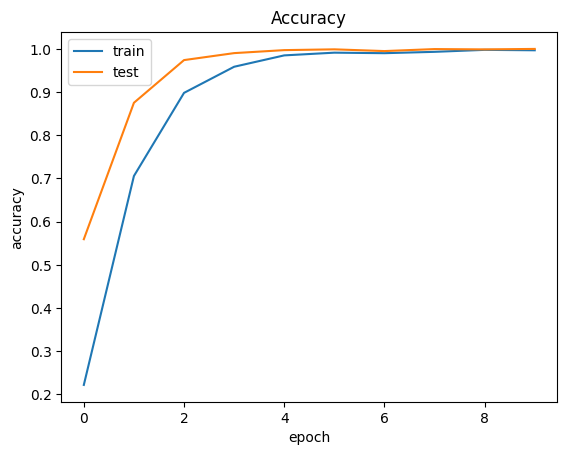

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

Drop labels from test data also and reshape into (28X 28) image.

In [ ]:
test_labels=test['label']
test.drop('label',axis=1,inplace=True)

test_images = test.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])

Preprocess test images.

In [ ]:
for image in test_images:
  image = image.reshape(28,28)
  image = preprocess_image(image)

Binalrize the labels and predict the test images to check accuracy.

In [ ]:
test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0],28,28,1)
test_images.shape
y_pred = model.predict(test_images)


225/225 [==============================] - 3s 11ms/step


The model is 85.2% accurate.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

0.8884551031790295

Create a function which returns the alphabet of the recognized number.

Python Code to open webcam in google colab.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Take a picture and save it. Then preprocess the image to feed it into the model. Keep on capturing till the word ends and then display the encoded message.

<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 82ms/step


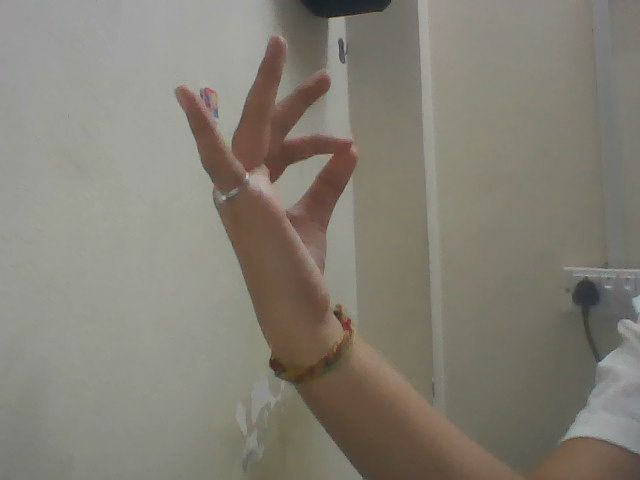

Recognized Sign: E
Do you want to capture another image? (yes/no): YES


<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 21ms/step


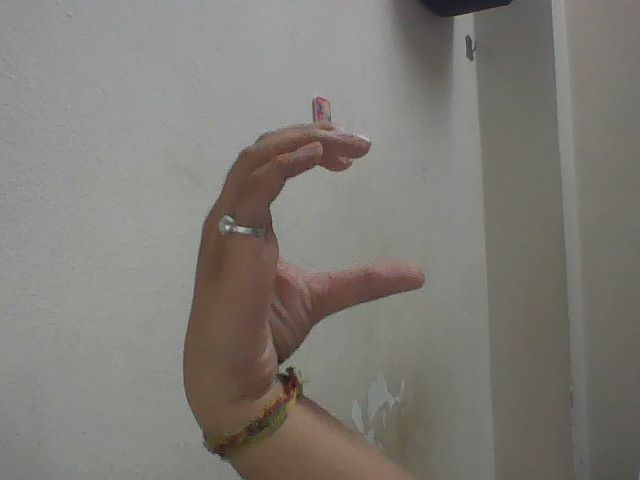

Recognized Sign: C
Do you want to capture another image? (yes/no): YES


<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 31ms/step


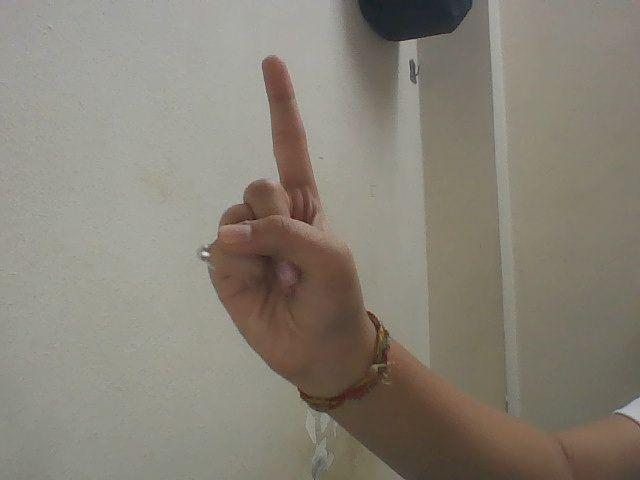

Recognized Sign: L
Do you want to capture another image? (yes/no): YES


<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 23ms/step


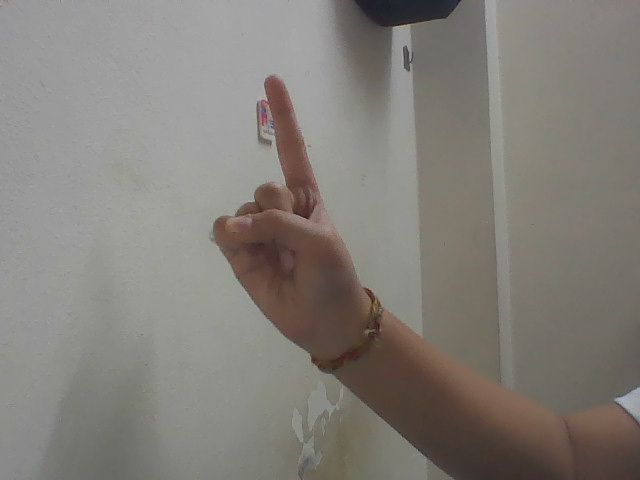

Recognized Sign: L
Do you want to capture another image? (yes/no): NO
Encoded Message: ECLL


In [ ]:
from IPython.display import display, Image
import cv2
import numpy as np

# Your model loading code (if not already loaded)
from tensorflow.keras.models import load_model
model = load_model("sign_mnist_cnn_epochs.h5")

def capture_and_recognize():
    recognized_message = ""  # Initialize an empty string to accumulate recognized signs

    try:
        while True:
            filename = take_photo()
            print('Saved to {}'.format(filename))

            # Load the captured image and preprocess it using cv2
            img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            img = cv2.resize(img, (28, 28))  # Resize to 28x28 to match the model's input shape
            img = img.reshape(1, 28, 28, 1)  # Reshape for model input

            # Make a prediction using your model
            prediction = model.predict(img)

            # Get the predicted class label
            predicted_class = np.argmax(prediction)

            # Display the recognized sign or letter
            classLabels = {
                0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',
                8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P',
                15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V', 21: 'W',
                22: 'X', 23: 'Y'
            }
            recognized_sign = classLabels[predicted_class]

            # Append the recognized sign to the message string
            recognized_message += recognized_sign

            # Show the image with recognized sign
            display(Image(filename))
            print(f"Recognized Sign: {recognized_sign}")

            # Ask the user if they want to continue
            user_input = input("Do you want to capture another image? (yes/no): ")
            if user_input.lower() != 'yes':
                break

    except Exception as err:
        # Handle errors, e.g., if the webcam is not available or permission is denied.
        print(str(err))

    # Display the final encoded message
    print(f"Encoded Message: {recognized_message}")

# Call the function to start capturing and recognizing images
capture_and_recognize()
